# An introduction to Pandas

[pandas](http://pandas.pydata.org) is a module which allows the construction of a *dataframe*, this is an object to store data that looks a little like a spreadsheet (the data is indexed principally by a column name and row name/number). It also includes functions designed to make working with this structured or tabular data fast and easy.  

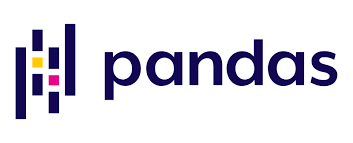

Again, the website for Pandas is good and contains the main set of documentation. It is a harder module to understand, and the documentation on the website is more dense to read. [Here](http://pandas.pydata.org/index.html) is the main website. 
- The main documentation for Pandas is [here](http://pandas.pydata.org/pandas-docs/stable/).
- There is a quick introduction to Pandas [here](http://pandas.pydata.org/pandas-docs/stable/10min.html)
- There is a fantastic tutorial (also in Jupyter) [here](http://pandas.pydata.org/pandas-docs/stable/tutorials.html) (under Lessons for New Pandas Users). This is well worth working through a little if you want a longer introduction to the basic concepts in Pandas.

Here are some basic examples to getting started with pandas, the datasets we use need to be copied into the same location as this notebook in order to use them in our code. 

In [ ]:
# Common pandas import statement
import pandas as pd

Next we will look at a dataset containing some information about recent oil reserves possessed by several different countries. Pandas allows us to *read* this data into a dataframe and then to extract various aspects of it.

In [ ]:
# Use the read_csv method to make a dataframe from 
# the csv file:
A = pd.read_csv('oil_reserve_data.csv')
# We can look at what the dataframe contains 
# note it looks a little like a spreadsheet view of the data
print(A)
print('-----')

# The keys() are the various names indexing our data - we can pull the 
# different columns by using these names:
print(A.keys())
print('-----')

# Let's pull the data from a particular column by referring to it
# by name:
print(A['Germany'])
print('-----')

In [ ]:
# We can also slice a row from our data - here we take the second row by number 
# (numerical index starts counting from 0):
print('Slice a row from our data - here we take the second row by number')
print(A.iloc[1])
print('-----')

# Note this returns the value indexed by each column name.
# We can also grab a column by number - here is the second column:
print('Grab a column by number - here is the second column')
print(A.iloc[:,1])
print('-----')

## Removing columns/indices <a name="removing"></a>
Similar to above, it is easy to remove entries. This is done with the `drop()` method and can be applied to both columns and indices:

In [ ]:
import numpy as np
# define new DataFrame using a function from NumPy (don't worry about what this line does just now)
data = np.reshape(np.arange(9), (3,3))

df = pd.DataFrame(data, index=['a','b','c'],
                  columns=['Edinburgh', 'Glasgow', 'Dundee'])
print(df)

In [ ]:
df.drop('b')  # remove row (index)~

In [ ]:
# You can also drop from a column - here is the way we would drop two columns:
df.drop(['Dundee', 'Glasgow'], axis='columns')

Note that the original data frame is unchanged: `df.drop()` gives us a new data frame with the desired data dropped, and leaves the original data intact. We can ask `.drop()` to operate directly on the original data frame by setting the argument `inplace=True`.

In [ ]:
# Original data frame that we created
print(df)

# Dropping the row called a and updating the df using "inplace=True"
df.drop('a', inplace=True)
print('-----')
print(df)

## Indexing

Rows and columns in a dataframe can be referred to by name (if they are given a name - for the example at the beginning using oil reserves we didn't specify row names), or by row/column number. 

**Important Note** - python starts counting from 0, i.e. 0, 1, 2, ... as indexing, not starts from 1 !

In [ ]:
df = pd.DataFrame(data, index=['a','b','c'],
                  columns=['Edinburgh', 'Glasgow', 'Dundee'])
print(df)

We can get the 'a' row by name or by knowing that it is row 0 using the following two pandas functions:

In [ ]:
# Note where the square brackets are!
print(df.loc['a'])
print('-----')
print(df.iloc[0])

We can also grab two rows at a time by listing them

In [ ]:
# Again note where the square brackets are!
print(df.loc[['a','b']])
print('-----')
print(df.iloc[[0,1]])

Likewise we can do similar things with **column names** and **numbers** and **multiple column names and numbers** 
- Here all in one go:

In [ ]:
print(df['Edinburgh'])
print('-----')

print(df.iloc[:,0])
print('=====')

print(df[['Edinburgh','Dundee']])
print('-----')

print(df.iloc[:,[0,2]])

## Summarizing and computing descriptive stats
`pandas` is equipped with common mathematical and statistical methods. Most of which fall into the category of reductions or summary statistics. These are functions that extract a single value from a list of values. For example, you can extract the sum of a column or row like this:

In [ ]:
print(df)

df.sum()

Notice how that created the sum of each column?

We can sum across rows by adding an extra option to `sum()`
   - using `axis='columns'` to get row sum
   - using `axis='rows'` to get column sum

In [ ]:
df.sum(axis='columns')

In [ ]:
df.sum(axis='rows')

A similar method also exists for obtaining the mean of data:

In [ ]:
# Return the mean of the values over the requested axis, by default axis=0
df.mean()

It is also possible to get an overall statistical description of the dataframe by using the `describe()` function. It is really crucial to understand the meaning of each row! We will talk about these measures regularly during the semester. Just to give a general idea, please look at the following diagram:

[![](https://mermaid.ink/img/pako:eNqtlEGPojAUx79K08nc0FAqKN1kkxWvXnYme1iYQ6UPacSWlDIja_zuWwHdcW4bLQlp__33995r0nfEuRaAGd4aXpfodfUtU8iNH-kKmtzI2sp3QC-WW9lYmTdvaDL5jpbpGnjTGkC6QAkoa3iFXkEJUHn3NhJ6Z_LZ-Ysb6UBajZbhvxyQ5Oy87Ixa4DQhv6o0XbucbxjJEIykP7naXrZGMUj7uCr_otPUlaUENwKt4P2a2OB5fnZiIRWgXFfaNB7a6EogCwfrIXcKbSqe71ChlR0cbmrQBqwFgwxwwTeykrYbaI3tKnA3UsiqYk9FeP68xhq9A_bk-_44n3xIYUsW1AfvDJ58gNyWlp0jD0IfqT_hxmf08oKO81CQK5pSejc6GdF5CKSIH4C-yZtcEu_HDf1_ryB4HIreibq5v8eVmDyuxOT-ErGH92D2XArXPo5neIZtCXvIMHNT97B2Gc7Uyfl4a_VLp3LMrGnBw0a32xKzgleNW7W14BZWkrsetL-q7uFbbdZDd-qblIdrrn5r_c_j1pgd8QEzQqdxRII4jkIyp-FsMfdwh1kYTGeELhZ-NHdbsT8_efhPTyBTSomrhEZ-5C_ILDz9BSZbmoo?type=png)](https://mermaid.live/edit#pako:eNqtlEGPojAUx79K08nc0FAqKN1kkxWvXnYme1iYQ6UPacSWlDIja_zuWwHdcW4bLQlp__33995r0nfEuRaAGd4aXpfodfUtU8iNH-kKmtzI2sp3QC-WW9lYmTdvaDL5jpbpGnjTGkC6QAkoa3iFXkEJUHn3NhJ6Z_LZ-Ysb6UBajZbhvxyQ5Oy87Ixa4DQhv6o0XbucbxjJEIykP7naXrZGMUj7uCr_otPUlaUENwKt4P2a2OB5fnZiIRWgXFfaNB7a6EogCwfrIXcKbSqe71ChlR0cbmrQBqwFgwxwwTeykrYbaI3tKnA3UsiqYk9FeP68xhq9A_bk-_44n3xIYUsW1AfvDJ58gNyWlp0jD0IfqT_hxmf08oKO81CQK5pSejc6GdF5CKSIH4C-yZtcEu_HDf1_ryB4HIreibq5v8eVmDyuxOT-ErGH92D2XArXPo5neIZtCXvIMHNT97B2Gc7Uyfl4a_VLp3LMrGnBw0a32xKzgleNW7W14BZWkrsetL-q7uFbbdZDd-qblIdrrn5r_c_j1pgd8QEzQqdxRII4jkIyp-FsMfdwh1kYTGeELhZ-NHdbsT8_efhPTyBTSomrhEZ-5C_ILDz9BSZbmoo)

In [ ]:
# Generate descriptive statistics.
df.describe()

## Data Loading

- Clearly one thing we will need to do often is to access datasets and load them into python in order to work with them. 
- A pandas dataframe is a really convenient way of storing data within python and manipulating it. 
- Thankfully pandas also has functions which help load in various different standard data storage formats. 

We'll come back to this topic later - but for now we will just introduce two ways to load data, contained in csv and excel formats.

`.csv` is a very common and portable data format. It is an easy to read file format which is usually visualised like a spreadsheet. The data itself is usually separated with a `,` which is called the **delimiter** separating enrties between the items to appear in each column, the next row is then simply on the next line.

Let's now see how we can load this data and analyse it - we have already seen this line before above - but here it is again reading in a `.csv` file

In [ ]:
reserves = pd.read_csv('oil_reserve_data.csv')

For reading in an excel file there is a similar `read_excel()` function we can use

In [ ]:
wood_imports = pd.read_excel('UK_wood_imports.xlsx')

- The `read_csv` function has a lot of optional arguments (more than 50). It's impossible to memorise all of them - it's usually best just to look up the particular functionality when you need it. 

- You can search `pandas read_csv` online and find all of the documentation.

There are also many other functions that can read textual data. Here are some of them:

| Function | Description
| -- | -- |
| read_csv       | Load delimited data from a file, URL, or file-like object. The default delimiter is a comma `,` |
| read_table     | Load delimited data from a file, URL, or file-like object. The default delimiter is tab `\t` |
| read_clipboard | Reads the last object you have copied (Ctrl-C) |
| read_excel     | Read tabular data from Excel XLS or XLSX file |
| read_hdf       | Read HDF5 file written by pandas |
| read_html      | Read all tables found in the given HTML document |
| read_json      | Read data from a JSON string representation |
| read_sql       | Read the results of a SQL query |

**Note: There are also other loading functions which are not touched upon here**

We will talk about some of these in a later notebook to give you some examples of different data types and how to work with them and read them into a dataframe for manipulation.

## Data Cleaning 

While planning and constructing a data analysis, a significant amount of time is spent on data preparation: loading, cleaning, transforming and rearranging. 

- Often the way the data is stored in files isn't in the correct format and needs to be modified. 
- Researchers usually do this on an ad-hoc basis using programming languages like Python, we will also be talking about examples of this where we simply do some of this preparation within Excel.

Here we will discuss some of the pandas tools available for handling missing data, duplicate data, string manipulation, and some other analytical data transformations.

### Handling missing data 
Missing data occurs commonly in many data analysis applications. One of the goals of pandas is to make working with missing data as painless as possible.

In pandas, missing numeric data is represented by `NaN` (Not a Number) and can easily be handled:

In [ ]:
# Here is our example dataframe again:
df = pd.DataFrame(data, index=['a','b','c'],
                  columns=['Edinburgh', 'Glasgow', 'Dundee'])
print(df)
print('-----')

# We will reset one element as NaN (note we have to get that from NumPy)
df['Edinburgh']['a']=np.nan
print(df)
print('-----')

# We can then find all the NaN values:
print(df.isnull())

Here are some other methods for working with `NaN` which you can find useful:
    
| Method | Description |
| -- | -- |
| dropna | Filter axis labels based on whether the values of each label have missing data|
| fillna | Fill in missing data with some value |
| isnull | Return boolean values indicating which values are missing |
| notnull | Negation of isnull |

Just like `.drop()`, these methods all return a new object, leaving the original unchanged (this behaviour can be overridden using the argument `inplace=True`).

`dropna()` by default removes any row that has any missing value. Here's the example with this applied:

In [ ]:
print(df.dropna())

We can also drop a row only if all of the entries are `NaN` - here's how:

In [ ]:
df['Edinburgh'] = np.nan
df.iloc[0] = np.nan

print(df)
print('-----')

print(df.dropna()) # Or write as print(df.dropna(how='any'))
print('-----')

# Using with additional 'how' argument below: 
# 'any' : If any NA values are present, drop that row or column.
# 'all' : If all values are NA, drop that row or column.
print(df.dropna(how='all'))

We could also choose to fill in the `NaN` values with a 0 say using `fillna()`

In [ ]:
print(df)
print('-----')

print(df.fillna(0))
print('-----')

## Data Transformation

### 1. Removing duplicates
Duplicate data can be a serious issue, luckily pandas offers a simple way to remove duplicates

In [ ]:
repeat_df = pd.DataFrame(['a','b','c','d','c','b','a'])
print(repeat_df)
print('-----')

print(repeat_df.drop_duplicates())

You can also select which rows to keep

In [ ]:
print(repeat_df.drop_duplicates(keep='last'))

### 2. Replacing data
We've seen how you can fill in missing non numerical data with `fillna()`. That is actually a special case of more general value replacement. That is done via the `replace()` method.

Let's consider an example where the dataset given to us had `-999` as sentinel values for missing data instead of `NaN`.

In [ ]:
sentinel_df = pd.DataFrame([1., -999., 2., -999., 3., 4., -999, -999, 7.])
print(sentinel_df)
print('-----')

print(sentinel_df.replace(-999, np.nan))

We could likewise have replaced with another number, or replaced text instead of numbers, and of course we can always make these changes with `inplace=True` as an option to modify our original dataframe.

### 3. Detecting and Filtering Outliers
Filtering or transforming outliers is largely a matter of applying array operations. Consider a dataframe with some normally distributed data (don't worry about how we are generating this - but it is done with NumPy again!):

In [ ]:
# Generate two columns of normal (Gaussian, bell-shaped) data with the same parameters) 
# each with 1000 data points
norm_data = pd.DataFrame(np.random.randn(1000, 2))
print(norm_data.describe())

Suppose we now want to find all the values exceeding 1.5 from the columns.

In [ ]:
print(norm_data[norm_data > 1.5])
# to see it better remove NaN:
print(norm_data[norm_data > 1.5].dropna(how='all'))

We could set a ceiling for these values at 1.5, by simply replacing them if they exceed that value:

In [ ]:
norm_data[norm_data > 1.5] = 1.5
norm_data.describe()

- Note the max of each column is now pinned at 1.5 exactly.

- What we just did is called **boolean indexing**. Where the condition we specify is `True` we ask pandas to do something, where it is `False` we leave the data alone.

=============================================================================================================

## Exercises

1) Read in the oil reserve data again and try extracting elements of it - 
- Get the second row
- Get the third column
- Get the column for 'Belgium'
- Get a short statistical summary of all the data
- Extract the column for 'Germany' and transform it so that the minimum value is pinned as 20000

In [ ]:
# Your code and calculations

---

2) Read in the excel data contained in 'UK_wood_imports.xlsx'. This is a UK dataset from [here](https://data.gov.uk/dataset/34758844-5e83-450a-81c9-7a0e2ca0d6b1/uk-wood-production-and-trade-2017-provisional-figures) containing information about UK wood imports (note the numbers are in thousands of cubic metres). 
- Read in the data into a dataframe and print it to the screen
- Get a short statistical summary of the data
- Get the third row in the 'Wood Pellets' column

In [ ]:
# Reading your data

In [ ]:
# Summary of data set and third row extraction

---

3) Lastly read in the 'mortality.xlsx' dataset. It contains reported mortality rates from a number of countries. Missing data in this dataset is noted with an entry that is a string consisting of two full stops '..'.
- Read in the dataset 
- Use replace to make the missing data `np.nan` rather than '..'
- Now make a version of the dataframe where rows that have missing data (now changed to be `np.nan`) are removed

In [ ]:
# Reading your data

In [ ]:
# Replacing missing data